In [1]:
#default_exp vision.core

In [2]:
#export
from local.imports import *
from local.test import *
from local.core import *
from local.data.pipeline import *
from local.data.core import *
from local.data.external import *

from PIL import Image

In [3]:
#export
_all_ = ['Image']

# Core vision
> Basic image opening/processing functionality

In [4]:
path = untar_data(URLs.MNIST_TINY)
fns = get_image_files(path)
fn = fns[0]; fn

PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/8055.png')

In [5]:
#export
class PILImage():
    @staticmethod
    def show(o, ctx=None, **kwargs): return show_image(o, ctx=ctx, **kwargs)

In [6]:
#export
class Imagify(Transform):
    "Open an `Image` from path `fn`"
    def __init__(self, func=Image.open):  self.func = func
    def encodes(self, fn)->PILImage: return self.func(fn)

In [28]:
timg = Imagify()
img = timg(fn)
test_eq(img.size, (28,28))
img

In [35]:
#export
class Mask(PILImage):
    @staticmethod
    def show(o, ctx=None, cmap='tab20', alpha=0.5, vmin=1, vmax=30, **kwargs): 
        return show_image(o, ctx=ctx, cmap=cmap, alpha=alpha, vmin=vmin, vmax=vmax, **kwargs)

In [36]:
#export
class Maskify(Transform):
    "Open an `Image` from path `fn`"
    def __init__(self, func=Image.open): self.func = func
    def encodes(self, fn)->Mask: return self.func(fn)

In [37]:
tmask = Maskify(func=lambda fn: Image.open(fn)/255)
mask = timg(fn)
test_eq(mask.size, (28,28))
mask

In [38]:
type(mask)

PIL.PngImagePlugin.PngImageFile

## Functions

In [39]:
#export
class ImageConverter(Transform):
    "Convert `img` to `mode`"
    def __init__(self, mode='RGB', mask_mode='L'): self.modes = (mode,mask_mode)
    def encodes(self, o:PILImage): return o.convert(self.modes[0])
    def encodes(self, o:Mask):     return o.convert(self.modes[1])

In [40]:
f = ImageConverter('RGB')
f.accept_types(PILImage)
test_eq(f(img).mode, 'RGB')
f.accept_types(Mask)
test_eq(f(mask).mode, 'L')

In [41]:
#export
def image_resize(img, size, resample=Image.BILINEAR):
    "Resize image to `size` using `resample"
    return img.resize(size, resample=resample)
image_resize.order=10

In [42]:
#export
class ImageResizer(Transform):
    "Resize image to `size` using `resample"
    def __init__(self, size, resample=Image.BILINEAR):
        if not is_listy(size): size=(size,size)
        self.size,self.resample = size,resample

    def encodes(self, o:PILImage): return image_resize(o, size=self.size, resample=self.resample)

In [44]:
f = ImageResizer(14)
f.accept_types(PILImage)
test_eq(f(img).size, (14,14))
f.accept_types(Mask)
test_eq(f(mask).size, (14,14))

In [45]:
# export
def image2byte(img):
    "Transform image to byte tensor in `c*h*w` dim order."
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes()))
    w,h = img.size
    return res.view(h,w,-1).permute(2,0,1)

In [54]:
#export
class ImageToByteTensor(Transform):
    "Transform image to byte tensor in `c*h*w` dim order."
    order = 15
    def encodes(self, o:PILImage)->TensorImage: return image2byte(o)
    def encodes(self, o:Mask)    ->TensorMask:  return image2byte(o)[0]

In [55]:
tfm = ImageToByteTensor()
tfm.accept_types(PILImage)
test_eq(tfm(img).shape, (1,28,28))
tfm.accept_types(Mask)
test_eq(tfm(mask).shape, (28,28))

Let's confirm we can pipeline this with `Imagify`.

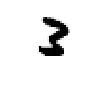

In [56]:
pipe = Pipeline([Imagify(), ImageToByteTensor()])
img = pipe(fn)
test_eq(img.shape, (1,28,28))
pipe.show(img, cmap="Greys", figsize=(1,1));

In [ ]:
@transform(ByteToFloatTensor)
def decodes(self, o:TensorMask): return o
def decodes(self, o:TensorMask): return o

In [ ]:
@docs
class ByteToFloatTensor(Transform):
    "Transform image to float tensor, optionally dividing by 255 (e.g. for images)."
    order=20 #Need to run after CUDA if on the GPU
    def __init__(self, div=True): self.div = div
    def encodes(self, o:TensorImage): return o.float().div_(255.) if self.div else o.float()
    def decodes(self, o:TensorImage): return o.clamp(0., 1.) if self.div else o
    
    _docs=dict(encodes="Convert items matching `mask` to float and optionally divide by 255",
               decodes="Clamp to (0,1) items matching `mask`")

## Export -

In [1]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)

Converted 00_test.ipynb.
Converted 01_core.ipynb.
Converted 02_data_pipeline.ipynb.
Converted 03_data_external.ipynb.
Converted 04_data_core.ipynb.
Converted 05_data_source.ipynb.
Converted 06_vision_core.ipynb.
Converted 07_pets_tutorial-meta.ipynb.
Converted 07_pets_tutorial-oo.ipynb.
Converted 07_pets_tutorial-oo1.ipynb.
Converted 07_pets_tutorial-oo2-meta.ipynb.
This cell doesn't have an export destination and was ignored:
 
Converted 07_pets_tutorial.ipynb.
Converted 08_augmentation.ipynb.
Converted 10_layers.ipynb.
Converted 11_optimizer.ipynb.
Converted 12_learner.ipynb.
Converted 13_callback_schedule.ipynb.
Converted 14_callback_hook.ipynb.
Converted 15_callback_progress.ipynb.
Converted 16_callback_tracker.ipynb.
Converted 17_callback_fp16.ipynb.
Converted 90_notebook_core.ipynb.
Converted 91_notebook_export.ipynb.
Converted 92_notebook_showdoc.ipynb.
Converted 93_notebook_export2html.ipynb.
Converted 94_index.ipynb.
Converted 95_synth_learner.ipynb.
